In [20]:
import os

from tqdm import tqdm 

import pandas as pd
import numpy as np

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

from scipy.stats import pearsonr
import scipy.stats as stats
from sklearn.linear_model import LinearRegression

In [21]:
seed = 42
n_cores = 20
data_path = '/nobackup/users/hmbaghda/metastatic_potential/'

In [71]:
X_train_val = pd.read_csv(os.path.join(data_path, 'interim', 'X_train_val.csv'), index_col = 0)
y_train_val = pd.read_csv(os.path.join(data_path, 'interim', 'y_train_val.csv'), index_col = 0)

X_test = pd.read_csv(os.path.join(data_path, 'interim', 'X_test.csv'), index_col = 0)
y_test = pd.read_csv(os.path.join(data_path, 'interim', 'y_test.csv'), index_col = 0)
y_test = y_test.values.flatten()

In [79]:
selected_features = pd.read_csv(os.path.join(data_path, 'interim', 'depr_selected_features.csv'), index_col = 0)
selected_feature_index = selected_features.index.tolist()
selected_feature_index = ['-'.join(i.split('.')) for i in selected_feature_index] # formatting R --> python

X_train_val.columns = ['-'.join(col.split('.')) for col in X_train_val.columns]
X_test.columns = ['-'.join(col.split('.')) for col in X_test.columns]

X_train_val = X_train_val.loc[:, selected_feature_index]
X_test = X_test.loc[:, selected_feature_index]

In [80]:
# res_ = res.infer_objects(copy = False).fillna('None')
# hyperparam_names = ['n_estimators', 'max_features', 'max_samples', 'max_depth', 'min_samples_split', 'min_samples_leaf']
# best_mse_params = list(res_.groupby(hyperparam_names)['mse'].mean().idxmin())
# best_mse_params = [x if x != 'None' else None for x in best_mse_params]
# best_mse_params = dict(zip(hyperparam_names, best_mse_params))

# for hp in ['max_features', 'max_depth']:
#     best_mse_params[hp] = int(best_mse_params[hp])

# best_mse_params

best_mse_params = {'n_estimators': np.int64(850),
 'max_features': 1,
 'max_samples': None,
 'max_depth': 25,
 'min_samples_split': np.int64(2),
 'min_samples_leaf': np.int64(1)}


In [74]:
rf_mse = []
rf_pearson = []
rf_spearman = []

n_splits = 10
kf = KFold(n_splits=n_splits, shuffle = True)

for i, (train_index, val_index) in tqdm(enumerate(kf.split(X_train_val, y_train_val))): # iterate through folds for train-val split and do the below loop for each fold

    X_train, _ = X_train_val.iloc[train_index], X_train_val.iloc[val_index]
    y_train, _ = y_train_val.iloc[train_index], y_train_val.iloc[val_index]
    y_train = y_train.values.flatten()

    # ACTUAL MODEL
    model = RandomForestRegressor(n_estimators = best_mse_params['n_estimators'],
                                  max_features = best_mse_params['max_features'],
                                  max_samples = best_mse_params['max_samples'],
                                  max_depth = best_mse_params['max_depth'],
                                  min_samples_split = best_mse_params['min_samples_split'],
                                  min_samples_leaf = best_mse_params['min_samples_leaf'],
                                  n_jobs = n_cores,
                                  random_state = seed)
    # # training on shuffled features (random baseline)
    # y_train_shuffled = y_train.values.reshape(-1).copy()
    # np.random.shuffle(y_train_shuffled)
    model.fit(X_train, y_train) # fit on the shuffled data

    # predict on non-shuffled features
    y_pred = model.predict(X_test)

    # store results
    rf_mse.append(mean_squared_error(y_test, y_pred))
    rf_pearson.append(pearsonr(y_test, y_pred))
    rf_spearman.append(stats.spearmanr(y_test, y_pred))





10it [00:25,  2.57s/it]


In [75]:
np.mean([p.statistic for p in rf_pearson])

np.float64(0.11514552894033234)

In [70]:
np.mean([p.statistic for p in rf_pearson])

np.float64(0.2328315466085024)

In [81]:
rf_mse = []
rf_pearson = []
rf_spearman = []

n_splits = 10
kf = KFold(n_splits=n_splits, shuffle = True)

for i, (train_index, val_index) in tqdm(enumerate(kf.split(X_train_val, y_train_val))): # iterate through folds for train-val split and do the below loop for each fold

    X_train, X_val = X_train_val.iloc[train_index], X_train_val.iloc[val_index]
    y_train, y_val = y_train_val.iloc[train_index], y_train_val.iloc[val_index]
    y_train = y_train.values.flatten()
    y_val = y_val.values.flatten()

    # ACTUAL MODEL
#     model = RandomForestRegressor(n_estimators = best_mse_params['n_estimators'],
#                                   max_features = best_mse_params['max_features'],
#                                   max_samples = best_mse_params['max_samples'],
#                                   max_depth = best_mse_params['max_depth'],
#                                   min_samples_split = best_mse_params['min_samples_split'],
#                                   min_samples_leaf = best_mse_params['min_samples_leaf'],
#                                   n_jobs = n_cores,
#                                   random_state = seed)
    
    model = RandomForestRegressor(n_jobs = n_cores,
                                  random_state = seed)
    # # training on shuffled features (random baseline)
    # y_train_shuffled = y_train.values.reshape(-1).copy()
    # np.random.shuffle(y_train_shuffled)
    model.fit(X_train, y_train) # fit on the shuffled data

    # predict on non-shuffled features
    y_pred = model.predict(X_val)

    # store results
    rf_mse.append(mean_squared_error(y_val, y_pred))
    rf_pearson.append(pearsonr(y_val, y_pred))
    rf_spearman.append(stats.spearmanr(y_val, y_pred))





10it [00:04,  2.23it/s]


In [82]:
np.mean([p.statistic for p in rf_pearson])

np.float64(0.6231993793954163)

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

In [58]:
for i, (train_index, val_index) in tqdm(enumerate(kf.split(X_train_val, y_train_val))): # iterate through folds for train-val split and do the below loop for each fold
    if i == 1:
        X_train, X_val = X_train_val.iloc[train_index], X_train_val.iloc[val_index]
        y_train, y_val = y_train_val.iloc[train_index], y_train_val.iloc[val_index]
        y_train = y_train.values.flatten()
        y_val = y_val.values.flatten()
        break

1it [00:00, 586.04it/s]


<Axes: ylabel='Density'>

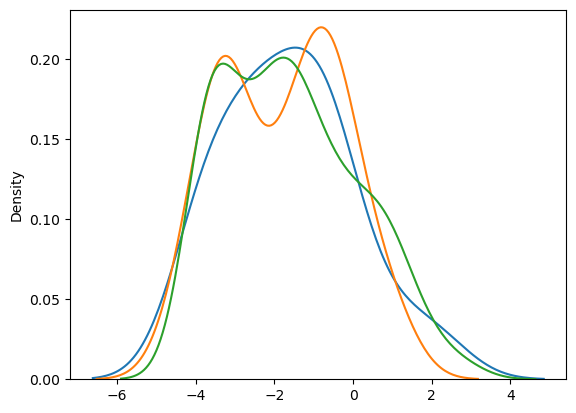

In [61]:
fig, ax = plt.subplots()
sns.kdeplot(y_val, ax = ax, label = 'actual')
sns.kdeplot(y_test, ax = ax, label = 'predicted')
sns.kdeplot(y_train, ax = ax, label = 'predicted')

<Axes: ylabel='Density'>

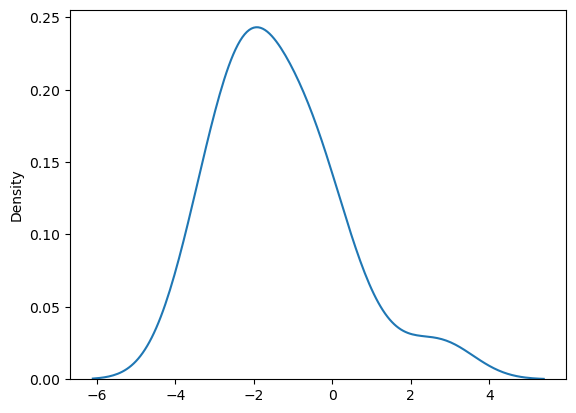

<Axes: ylabel='Density'>

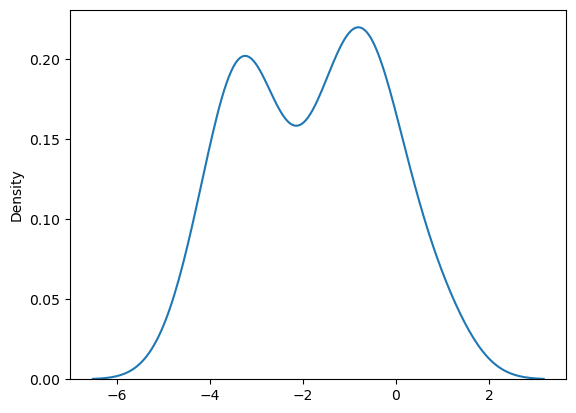

In [39]:
[p.statistic for p in rf_pearson]

[np.float64(0.8502324794790702),
 np.float64(0.8900535930006648),
 np.float64(0.7044611563222472),
 np.float64(0.8577679818256351),
 np.float64(0.7720450360269476),
 np.float64(0.9254966538218722),
 np.float64(0.7286321793164049),
 np.float64(0.8850549002048388),
 np.float64(0.8441658384082422),
 np.float64(0.8746779426924304)]

In [40]:
np.mean([p.statistic for p in rf_pearson])

np.float64(0.8332587761098355)

In [31]:
[p.statistic for p in rf_pearson]

[np.float64(0.24836526477205806),
 np.float64(0.18882709428075695),
 np.float64(0.18949013024431577),
 np.float64(0.23436328095503733),
 np.float64(0.19517475053727948),
 np.float64(0.25758854784895835),
 np.float64(0.23366663323750464),
 np.float64(0.18581613685138776),
 np.float64(0.24730706719421192),
 np.float64(0.20350485930740875)]

In [33]:
np.mean([p.statistic for p in rf_pearson])

np.float64(0.2184103765228919)

In [32]:
np.mean([p.statistic for p in rf_pearson])

np.float64(0.2184103765228919)

In [28]:
np.mean([p.statistic for p in rf_pearson])

np.float64(0.21867134115565587)

In [19]:
np.mean([p.statistic for p in rf_pearson])

np.float64(0.2107331891082349)

In [6]:
rf_pearson

[PearsonRResult(statistic=np.float64(0.18898264232206188), pvalue=np.float64(0.20844997974107812)),
 PearsonRResult(statistic=np.float64(0.25235081577270346), pvalue=np.float64(0.09065944587794306)),
 PearsonRResult(statistic=np.float64(0.22664525294713517), pvalue=np.float64(0.1298569315371)),
 PearsonRResult(statistic=np.float64(0.21809065736466116), pvalue=np.float64(0.14537936977441845)),
 PearsonRResult(statistic=np.float64(0.23967531732667333), pvalue=np.float64(0.10864747813884885)),
 PearsonRResult(statistic=np.float64(0.20676344282093462), pvalue=np.float64(0.16798869576423942)),
 PearsonRResult(statistic=np.float64(0.2579772490696711), pvalue=np.float64(0.08345730186994711)),
 PearsonRResult(statistic=np.float64(0.22673880132389024), pvalue=np.float64(0.1296943452428685)),
 PearsonRResult(statistic=np.float64(0.25048789542465005), pvalue=np.float64(0.09314755138201866)),
 PearsonRResult(statistic=np.float64(0.24548905789357295), pvalue=np.float64(0.10008560002449428))]

In [61]:
y_pred

array([-1.56093728, -0.94204902, -1.6349899 , -1.41862062, -1.76053958,
       -1.18147114, -1.8719264 , -1.37790161, -1.94459033, -1.71356756,
       -1.56643192, -2.20652747, -1.46287334, -1.16829814, -1.29843077,
       -1.04836812, -1.89047599, -2.03876644, -0.78611356, -1.28246168,
       -2.28050832, -1.70636575, -1.46087174, -1.63282035, -1.67581432,
       -1.69941386, -1.89251902, -1.68891085, -1.79536695, -1.68181596,
       -0.98974806, -1.64609567, -1.61547171, -1.50081229, -1.78545324,
       -1.75446019, -1.71656779, -1.96649416, -1.72883712, -2.01120151,
       -1.24736955, -2.06782622, -1.49713663, -1.62209141, -1.38066736,
       -0.89321234])

In [29]:
y_pred

array([-1.68769417, -0.82605535, -1.69000056, -1.3477291 , -1.70552701,
       -1.18819499, -1.76194308, -1.44865451, -1.93319881, -1.76671943,
       -1.48143044, -2.0771705 , -1.39989795, -1.30339735, -1.34194877,
       -1.00936808, -1.88674267, -2.04838034, -0.7545633 , -1.26668222,
       -2.2501269 , -1.62513068, -1.46957948, -1.62690455, -1.67585733,
       -1.59833999, -1.79910003, -1.63450723, -1.74151919, -1.6270904 ,
       -0.95610886, -1.75031271, -1.61299769, -1.40687082, -1.73162797,
       -1.74344652, -1.73968625, -2.00004862, -1.66168871, -1.9598469 ,
       -1.19895341, -1.97431925, -1.40940372, -1.50373621, -1.34616631,
       -1.03315551])